[[1 2 3]
 [4 5 6]
 [0 0 0]
 [5 6 7]]
[[9 8 7]
 [4 5 6]
 [0 0 0]
 [5 6 7]]
[[2 1 3]
 [5 4 6]
 [0 0 0]
 [6 5 7]]
[[8 9 7]
 [5 4 6]
 [0 0 0]
 [6 5 7]]
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [3, 2, 1], []]


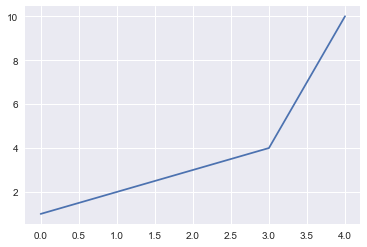

In [218]:
        ## CS 230 PROJECT STATISTICAL ANALYSIS## (Tristan Gosakti tgosakti and Ellen Roper eroper)
    ### NOTE - A LOT OF THE CODE IS MESSY BECAUSE STATISTICAL ANALYSIS WAS DONE IN A VERY QUICK-ITERATING FASHION ###

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import json
import statistics as stat

import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

# from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

strokeTypes = 6
fullSize = 2100
%matplotlib inline
#np.random.seed(1)

a = [1, 2, 3]
a = np.array(a)
b = np.transpose(a)
#print(b, b.shape)

#later: do analysis on average size before padding and see if we have to cut any off

test1 = np.array([[1, 2, 3], [4, 5, 6], [0, 0, 0], [5, 6, 7]])
print(test1)
test2 = np.array([[9, 8, 7], [4, 5, 6], [0, 0, 0], [5, 6, 7]])
print(test2)

def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    
shuffle_in_unison_scary(np.transpose(test1), np.transpose(test2))
print(test1)
print(test2)

while(False):
    x = np.array([11, 2, -21.15, 19.34, 24.39, 2, 16.91, 46.06, -7.11, 2, 5.89, -55.59, 2.29, 2])
    print("type: ", type(x), x.shape)
    print("before: ", x)
    x = np.delete(x, slice(None, None, 3))
    print("after: ", x)
    y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
    print("before: ", y)
    y = np.delete(y[1:], slice(None, None, 4))
    print("after: ", y)

    print("boom shaka laka")
    y = np.array([11, 2, -21.15, 19.34, 24.39, 2, 16.91, 46.06, -7.11, 2, 5.89, -55.59, 2.29, 2, -4.15, -75.90, -3.11, 2, -15.56, 18.24, 9.89, 2, -23.69, 9.92, 68.93])
    print("before: ", y)
    y = y[1:]
    y = np.delete(y, slice(None, None, 4))
    print("after: ", y)

    

allPara = [[]]*25
allPara[23] = [3, 2, 1]
print(allPara)

while(False):
    allPara[1] = [1, 2, 3]
    allPara[24] = [3, 2, 1]
    print(allPara)

    
plt.plot([1,2,3,4, 10])
plt.show()


0 oneSampleFlatten:  [ 29.58 -20.54  37.91 ..., -27.72 -28.34 -43.7 ]
0 oneSampleFlatten:  [ 26.24 -24.36  46.77 ..., -46.   -13.8  -21.88]
0 oneSampleFlatten:  [ 26.38 -26.31  43.56 ..., -38.86  -0.23 -26.15]
0 oneSampleFlatten:  [ 24.75 -20.49  40.25 ..., -53.83  43.01 -23.54]
0 oneSampleFlatten:  [ 21.33 -23.14  38.46 ..., -23.93  25.25 -38.26]
0 oneSampleFlatten:  [ 23.51 -23.89  35.37 ..., -42.12  46.13 -25.65]
0 oneSampleFlatten:  [ 26.89 -20.84  45.35 ..., -43.09  41.88  -5.09]
0 oneSampleFlatten:  [ 25.67 -25.6   38.92 ..., -28.59  18.51 -52.67]
0 oneSampleFlatten:  [ 22.51 -20.74  35.68 ..., -37.34  41.5  -27.6 ]
0 oneSampleFlatten:  [ 29.13 -22.47  42.69 ..., -38.25  55.44 -36.88]
1 oneSampleFlatten:  [ 27.23 -26.41  35.57 ..., -57.52  -5.33 -17.68]
1 oneSampleFlatten:  [ 26.99 -28.87  39.25 ..., -63.45   7.49 -28.74]
1 oneSampleFlatten:  [ 23.63 -31.54  37.71 ..., -38.58 -21.31 -43.11]
1 oneSampleFlatten:  [ 20.78 -28.61  31.69 ..., -58.44  24.74 -29.9 ]
1 oneSampleFlatten: 

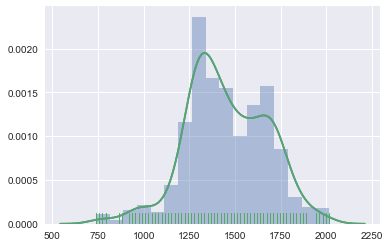

In [219]:
### NOTE - A LOT OF THE CODE IS MESSY BECAUSE STATISTICAL ANALYSIS WAS DONE IN A VERY QUICK-ITERATING FASHION ###

trainSamples = [] #this will be x_train
groundTruth = [] #this will be y

inputSizeDist = []
inputMax = -1

boom = []
st1 = []
counter1 = 0
boomMax = -1

for strokeType in range (1, strokeTypes+1):
    noFiles = 10
    for i in range (0, noFiles): #processing every file/batch #FIX LATER

        #naming
        frameDataName = str(strokeType) + "-" + str(i+1) + "-TSFrameData.txt"
        motionDataName = str(strokeType) + "-" + str(i+1) + "-TSMotionData.txt"

        #loading and processing
        frameData = np.loadtxt(frameDataName)
        
        with open(motionDataName) as f: #for every file
            for line in f: #for every json entry, should be around 10 
                line = json.loads(line)
                oneSample = []
                
                parai = []
                for sl in range (int(line["startIndex"]), int(line["endIndex"])):
                    timeSlice = frameData[sl]
                    timeSlice = np.delete(timeSlice[1:], slice(None, None, 4))
                    oneSample.append(timeSlice)
                    
                if(False):
                    #STATISTICS STUFF   
                    print("oneSampleNp.shape[0]: ", oneSampleNp.shape[0])
                    st1.append(oneSampleNp.shape[0])

                    
                    if(oneSampleNp.shape[0] < 40):
                        print("               FOUND ONE YO!!!: ", oneSampleNp.shape[0])
                        counter1 += 1
                
                oneSampleNp = np.vstack(oneSample)
                
                oneSampleFlatten = oneSampleNp.flatten() #max size is 2400, we'll pad until 2500 -> OUTDATED. new padding
                
                
                
                if(strokeType == 1):
                    print(i, "oneSampleFlatten: ", oneSampleFlatten)
                
                
                
                #print("oneSampleFlatten.shape[0]: ", oneSampleFlatten.shape[0])
                boom.append(oneSampleFlatten.shape[0])
                if(boomMax < oneSampleFlatten.shape[0]):
                    boomMax = oneSampleFlatten.shape[0]
                
                #print("input vector size: ", oneSampleFlatten.size)
                
                #print("BEFORE oneSampleFlatten: ", oneSampleFlatten.size, oneSampleFlatten)
                #THIS IS WRONG CODE: oneSampleFlatten = np.delete(oneSampleFlatten[1:], slice(None, None, 4))
                #print("AFTER oneSampleFlatten: ", oneSampleFlatten.size, oneSampleFlatten)
                

                #statistics work
                inputSizeDist.append(oneSampleFlatten.size)
                if(oneSampleFlatten.size > inputMax):
                    inputMax = oneSampleFlatten.size
                    
                #pad
                oneSamplePadded = np.pad(oneSampleFlatten, (0, fullSize-oneSampleFlatten.size), 'constant')
                
                oneSampleFlattenupPadded = np.pad(oneSampleFlattenup, (0, fullSize-oneSampleFlattenup.size), 'constant')
                oneSampleFlattendownPadded = np.pad(oneSampleFlattendown, (0, fullSize-oneSampleFlattendown.size), 'constant')
                #trainSamples.append(oneSampleFlattenupPadded)
                #trainSamples.append(oneSampleFlattendownPadded)
                
                trainSamples.append(oneSamplePadded)

                
                #making y for every x
                singleY = [0] * strokeTypes
                singleY[strokeType-1] = 1
                groundTruth.append(singleY)
                #groundTruth.append(singleY)
                #groundTruth.append(singleY)

                #print("the inputMax is: ", inputMax)
                

                
#statistic analysis on strokes
print("len(trainSamples[0]): ", len(trainSamples[0]))
print("trainSamples[0]: ", trainSamples[0])
print("trainSamples[0][:10] ", trainSamples[0][:10])
print("trainSamples[0][10:20] ", trainSamples[0][10:20])

print("trainSamples[0][::18]: ", trainSamples[0][::18])
print("trainSamples[0][0]: ", trainSamples[0][0], trainSamples[0][24])



if(False): 
    plt.plot(trainSamples[0][::18], 'r--', trainSamples[0][1::18], 'b--', trainSamples[0][2::18], 'g--')
    plt.show()

    plt.plot(trainSamples[1][::18], 'r--', trainSamples[1][1::18], 'b--', trainSamples[1][2::18], 'g--')
    plt.show()

    plt.plot(trainSamples[500][::18], 'r--', trainSamples[500][1::18], 'b--', trainSamples[500][2::18], 'g--')
    plt.show()

    plt.plot(trainSamples[499][::18], 'r--', trainSamples[499][1::18], 'b--', trainSamples[499][2::18], 'g--')
    plt.show()

    plt.plot(trainSamples[110][::18], 'r--', trainSamples[110][1::18], 'b--', trainSamples[110][2::18], 'g--')
    plt.show()

    plt.plot(trainSamples[220][::18], 'r--', trainSamples[220][1::18], 'b--', trainSamples[220][2::18], 'g--')
    plt.show()

    plt.plot(trainSamples[330][::18], 'r--', trainSamples[330][1::18], 'b--', trainSamples[330][2::18], 'g--')
    plt.show()

    plt.plot(trainSamples[440][::18], 'r--', trainSamples[440][1::18], 'b--', trainSamples[440][2::18], 'g--')
    plt.show()

    
    
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

print(boomMax)
sns.distplot(boom)
sns.distplot(boom, rug=True, hist=False)
    
    
print("number of input vectors: ", len(inputSizeDist))
print("input max: ", inputMax)
#sns.distplot(inputSizeDist);

trainSamplesnp = np.vstack(trainSamples)
groundTruthnp = np.vstack(groundTruth)

#print("endGroundTruth: ", np.shape(groundTruthnp))
#print("trainSamplenpFinal", np.shape(trainSamplesnp))

x_train = np.transpose(trainSamplesnp)
y_train = np.transpose(groundTruthnp)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("random1: ", y_train)






#shuffle with 2 matrices - found things online
def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

shuffle_in_unison_scary(np.transpose(x_train), np.transpose(y_train))
#print(x_train.shape)
#print(y_train.shape)
print("random2: ", y_train)


if(False):
    #statistics stuff
    print("counter1: ", counter1)
    print("mean: ", stat.mean(st1))
    print("stdev: ", stat.stdev(st1))

    #np.histogram(st1, bins=10, range=None, normed=False, weights=None, density=None)
    plt.hist(st1, bins='auto')
    plt.title("Histogram: 507 training samples' number of time ticks")
    plt.show()

    sns.distplot(st1)
    sns.distplot(st1, rug=True, hist=False)


2100 [ 13.33   1.35   4.78 ...,   0.     0.     0.  ]


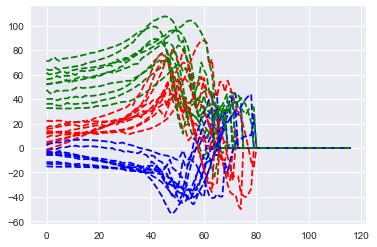

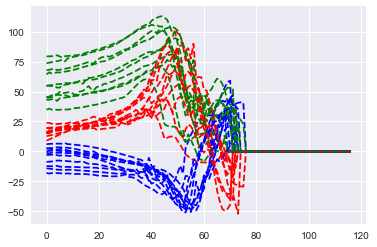

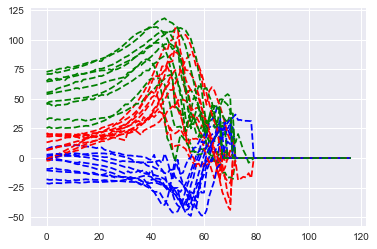

mean:  3.32777777778
stdev:  14.50167967439237


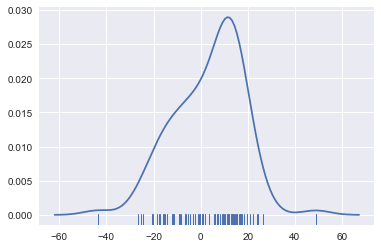

In [318]:

#STATISTICS TESTING

#Goal: find standard deviation and means to see noise we can input.

#i = 1 #(training sample, 508 total I think)
para = 0 #parameter (18 total)

print(len(trainSamples[i]), trainSamples[i])

#plt.plot(trainSamples[0][0::18], 'r--', trainSamples[0][1::18], 'b--', trainSamples[0][2::18], 'g--')
#plt.show()
ellen = 20

for sample in range(110, 120):
    plt.plot(trainSamples[sample][0::18], 'r--', trainSamples[sample][1::18], 'b--', trainSamples[sample][2::18], 'g--')
plt.show()

for sample in range(130, 140):
    plt.plot(trainSamples[sample][0::18], 'r--', trainSamples[sample][1::18], 'b--', trainSamples[sample][2::18], 'g--')
plt.show()

for sample in range(140, 150):
    plt.plot(trainSamples[sample][0::18], 'r--', trainSamples[sample][1::18], 'b--', trainSamples[sample][2::18], 'g--')
plt.show()




if(False):
    for sample in range(ellen, ellen+1):
        plt.plot(trainSamples[sample][2::18], 'r-', trainSamples[sample][4::18], 'b-', trainSamples[sample][5::18], 'g-')
    plt.title('FH Flat, Sensor 2\'s 3 parameters')
    plt.ylabel('Sensor Values')
    plt.xlabel('Time (x10ms)')
    plt.show()

    for sample in range(ellen, ellen+1):
        plt.plot(trainSamples[sample][6::18], 'r-', trainSamples[sample][7::18], 'b-', trainSamples[sample][8::18], 'g-')
    plt.title('FH Flat, Sensor 3\'s 3 parameters')
    plt.ylabel('Sensor Values')
    plt.xlabel('Time (x10ms)')
    plt.show()

    for sample in range(ellen, ellen+1):
        plt.plot(trainSamples[sample][9::18], 'r-', trainSamples[sample][10::18], 'b-', trainSamples[sample][11::18], 'g-')
    plt.title('FH Flat, Sensor 4\'s 3 parameters')
    plt.ylabel('Sensor Values')
    plt.xlabel('Time (x10ms)')
    plt.show()

    for sample in range(ellen, ellen+1):
        plt.plot(trainSamples[sample][12::18], 'r-', trainSamples[sample][13::18], 'b-', trainSamples[sample][14::18], 'g-')
    plt.title('FH Flat, Sensor 5\'s 3 parameters')
    plt.ylabel('Sensor Values')
    plt.xlabel('Time (x10ms)')
    plt.show()

    for sample in range(ellen+1, ellen+2):
        plt.plot(trainSamples[sample][15::18], 'r-', trainSamples[sample][16::18], 'b-', trainSamples[sample][17::18], 'g-')
    plt.title('FH Flat, Sensor 6\'s 3 parameters')
    plt.ylabel('Sensor Values')
    plt.xlabel('Time (x10ms)')
    plt.show()




for sample in range(0, 0):
    plt.plot(trainSamples[sample][6::18], 'r--', trainSamples[sample][7::18], 'b--', trainSamples[sample][8::18], 'g--')
    plt.show()
    
    
    
if(False):
    #getting mean and S.D. stats for each parameter over many training samples
    toGraph = []
    for sample in range(104, 200):
        toGraph.append(trainSamples[sample][2::18][2])
    sns.distplot(toGraph, rug=True, hist=False) 
    print("mean: ", stat.mean(toGraph))
    print("stdev: ", stat.stdev(toGraph))


#distribution for adding noise
noise = []
for i in range(101, 200):
    noise.append(trainSamples[i][5::18][20])
sns.distplot(noise, rug=True, hist=False) 
print("mean: ", stat.mean(noise))
print("stdev: ", stat.stdev(noise))


#Failed attempt at graphing list of lists to look at variability of same strokes
if(False):
    test = []
    for ts in range(0, 100):
        test.append(trainSamples[ts]) #[para]

    
        
    

    
    
    if(True):
        sns.distplot(test, rug=True, hist=False)

        x = list(range(2000))
        y = test
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.title("A test graph")
        
        for i in range(len(y)):
            plt.plot(x,[pt[i] for pt in y],label = 'id %s'%i)
        plt.legend()
        plt.show()


        
if(False):
    for lol in range(0, len(test)):
        print("length: ", len(test[lol]))
        